## Chord Player
This notebook plays a chord that is specified by a list of numbers. An octave is divided into 12 logarihmically spaced pieces. The chord is determined by a list. The sound is produced by making use of the Karplus-Strong method for guitar string sound generation.

The 'root' is selected as 87.31 Hz by default, which corresponds to F (or la). This is denoted as '0'.

In [1]:
BaseFreq =  87.31 # frequency corresponding to F
T = 5.0 # duration in seconds
fs = 16000 # sampling rate in Hz

In [2]:
import numpy as np
#from IPython.display import Audio
import IPython
import matplotlib.pyplot as plt

In [3]:
def KarplusStrong(fs, f0, T):
#    np.random.seed(0)
    P = np.round(fs / f0).astype(int)
    K = np.round(T * fs).astype(int)
    y = np.zeros(K)
    y[:P+1] = np.random.normal(0,1,P+1)
    for k in np.arange(P+1,K):
        y[k] = 0.5 * (y[k-P] + y[k - P - 1])
    y[:P-10] = 0
    return y

def ConstructChord(NoteList):
    K = np.round(T * fs).astype(int)
    x = np.zeros((K, len(NoteList)))
    w = np.linspace(0, fs, x.shape[0])    
    wind = (w < BaseFreq * 2**4) & (w > BaseFreq/2)

    # create figure
    fig = plt.figure(figsize = (15,5))
    ax = fig.add_subplot(111)
    for ind, k in enumerate(NoteList):
        f0 = BaseFreq  * np.power(2, k / 12)
        x[:,ind] = KarplusStrong(fs, f0, T)
        X = np.fft.fft(x[:,ind])
        ax.plot(w[wind], np.abs(X[wind]), label = '{}'.format(k))
    ax.legend()
    ticks = BaseFreq * (2**(np.arange(-1,4,1/12)))
    ticklabels = [''] * ticks.size
    ticklabels[::12] = 'F' * 5
    ax.set_xscale('log', basex = 2.0)
    ax.set_xticks(ticks, minor = False)
    ax.set_xticklabels(ticklabels)

    ax.set_yscale('log')
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Magnitude (dB)')
    ax.grid(axis='x')
    return x




Let us now declare some chords according to the numbering convention described above.

In [4]:
Set_of_Chords = {}
Set_of_Chords['F7'] = [0, 4, 10, 14]
Set_of_Chords['Fmaj'] = [0, 4, 7]
Set_of_Chords['Fmin'] = [0, 3, 7]
Set_of_Chords['bB7'] = [-7, 3, 9]
Set_of_Chords['C7'] = [7, 11, 17, 21]
Set_of_Chords['D'] = [0, 7, 12, 16]
Set_of_Chords['Fpower'] = [0, 7, 12]

We now show the spectrograms for these chords.

F7


Fmaj


Fmin


bB7


C7


D


Fpower


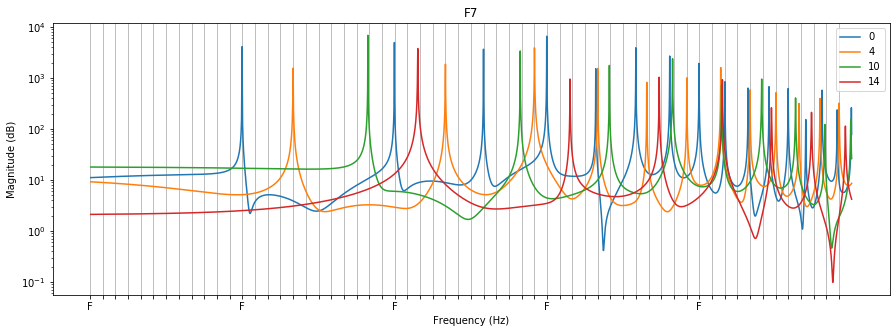

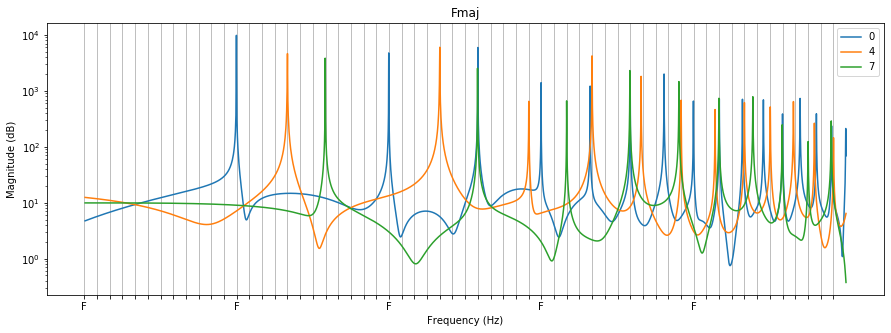

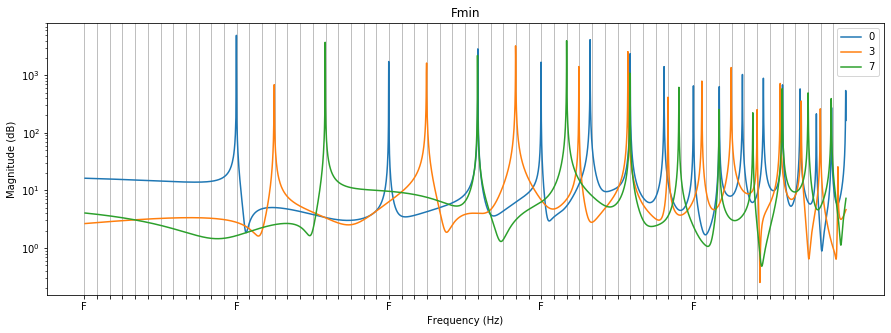

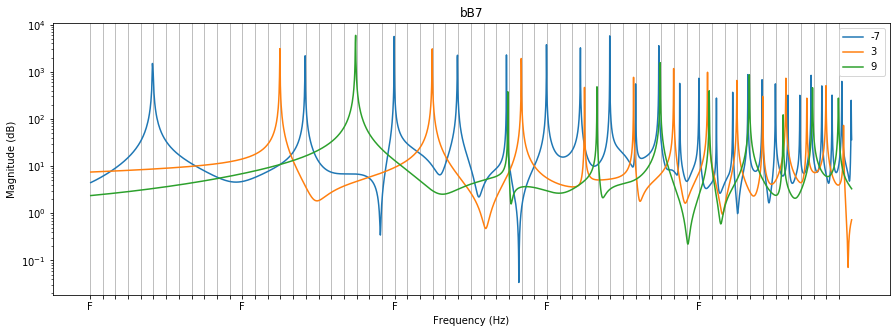

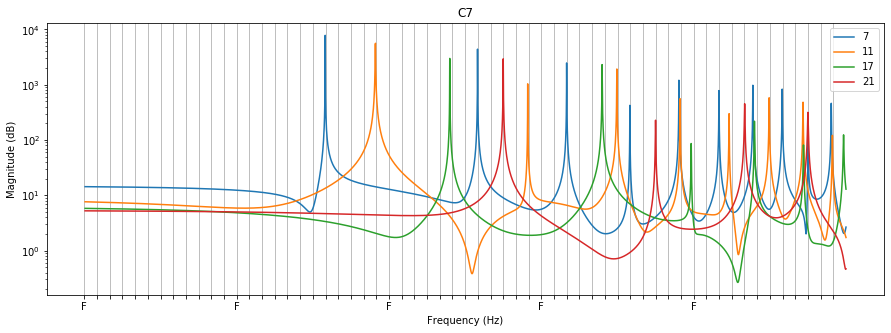

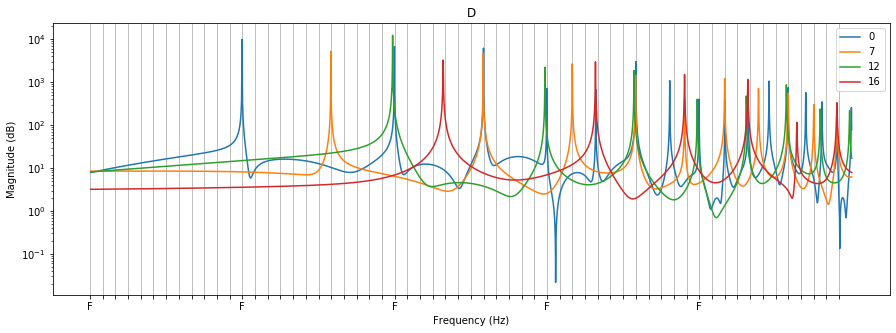

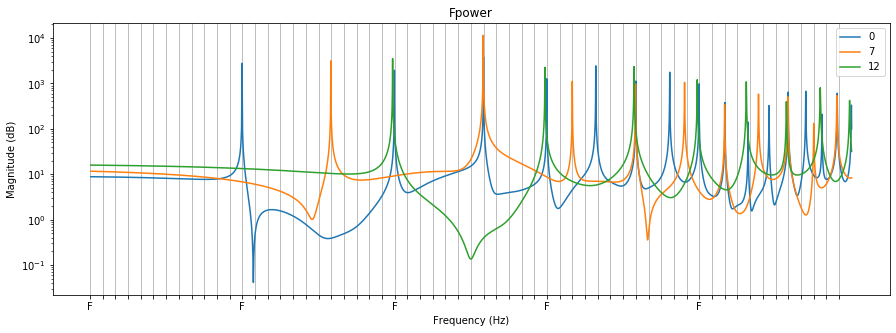

In [5]:
padT = 0.1 # duration of silence before the chord, in seconds
pad = np.zeros(int(fs * padT))
for key in Set_of_Chords:
    Notelist = Set_of_Chords[key]
    x0 = ConstructChord(Notelist)
    plt.title(key)
    print(key)
    IPython.display.display(IPython.display.Audio(np.concatenate((pad, np.sum(x0, axis = 1))), rate=fs))

_İlker Bayram, ibayram@ieee.org, 2019_